In [1]:
# The code was removed by Watson Studio for sharing.

### Creating a model using Simple Linear Regression algorithm to predict "The number of future complaints" (of the top complaint type)

### Step 1 - Create pandas dataframe "df_data_1" with only 2 columns from the data available in csv format

In [19]:
col = ['created_date','complaint_type'] 

body = client_273faebd9bbe4696bb7782fea6804875.get_object(Bucket='capstoneex1ram-donotdelete-pr-c3pfkhjz0s3lno',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
df_data_1 = pd.read_csv(body, usecols = col, parse_dates = ['created_date'])
df_data_1.head()


,created_date,complaint_type
0,2019-09-23 23:44:07,GENERAL
1,2019-09-23 22:45:58,APPLIANCE
2,2019-09-23 05:27:25,WATER LEAK
3,2019-09-23 07:47:31,PLUMBING
4,2019-09-23 22:02:53,GENERAL


### Step 2 - Import all required libraries

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Step 3 - Calculate total number of complaints for each complaint type

In [8]:
df_data_1["complaint_type"].value_counts()

HEAT/HOT WATER            1152173
HEATING                    887869
PLUMBING                   703354
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       438182
PAINT - PLASTER            361258
PAINT/PLASTER              341577
ELECTRIC                   303834
NONCONST                   260890
DOOR/WINDOW                200360
WATER LEAK                 188142
GENERAL                    146746
FLOORING/STAIRS            135528
APPLIANCE                  110021
HPD Literature Request      52830
SAFETY                      50182
OUTSIDE BUILDING             7038
ELEVATOR                     6466
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complain

### Step 4 - To consider both HEAT/HOT WATER and HEATING complaints for this problem, replacing values HEATING with HEAT/HOT WATER


In [9]:
df_data_1["complaint_type"] = np.where(df_data_1["complaint_type"]=='HEATING','HEAT/HOT WATER',df_data_1["complaint_type"])

### Step 5 - Re-calculate the total number of complaints for each complaint type

In [10]:
df_data_1["complaint_type"].value_counts()

HEAT/HOT WATER            2040042
PLUMBING                   703354
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       438182
PAINT - PLASTER            361258
PAINT/PLASTER              341577
ELECTRIC                   303834
NONCONST                   260890
DOOR/WINDOW                200360
WATER LEAK                 188142
GENERAL                    146746
FLOORING/STAIRS            135528
APPLIANCE                  110021
HPD Literature Request      52830
SAFETY                      50182
OUTSIDE BUILDING             7038
ELEVATOR                     6466
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complaint_type, dtype: int64

### Step 6 - Create a sub dataframe "df_data_top_complaint" that contains only samples with top complaint type i.e. HEAT/HOT WATER, from the main dataframe "df_data_1"

In [21]:
df_data_top_complaint = df_data_1[df_data_1["complaint_type"]=="HEAT/HOT WATER"].reset_index(drop=True)
df_data_top_complaint.head()

,created_date,complaint_type
0,2019-09-23 22:37:17,HEAT/HOT WATER
1,2019-09-23 22:33:12,HEAT/HOT WATER
2,2019-09-23 06:21:40,HEAT/HOT WATER
3,2019-09-23 06:36:46,HEAT/HOT WATER
4,2019-09-23 09:07:25,HEAT/HOT WATER


In [ ]:
### Step 7 - Create time series to get and analyze data with respect to every year, summed upon each month

In [22]:
time_series = pd.Series(1, index = df_data_top_complaint['created_date'])
time_series = time_series.resample('M').sum()
time_series.head(10)

created_date
2014-03-31    14462
2014-04-30    13382
2014-05-31     4262
2014-06-30     2747
2014-07-31     2490
2014-08-31     2163
2014-09-30     2368
2014-10-31    16733
2014-11-30    42458
2014-12-31    31702
Freq: M, dtype: int64

### Step 8 - Plot a "line diagram" to analyze occurance of top complaint type by year

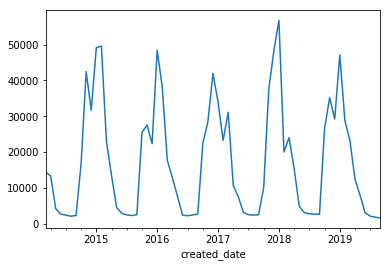

In [23]:
import matplotlib.pyplot as plt
time_series.plot(kind='line')

### Conclusions
### From the above graph, we can conclude that number of top complaint type i.e. HEAT/HOT WATER increases at the beginning of every year i.e. during winters and decreses after mid-year i.e. during summers'

### Step 9 - Calculate the total number of top complaint type per year

In [24]:
df_group = df_data_top_complaint.groupby(df_data_top_complaint.created_date.dt.year)

### Step 10 - Conver thet Group By Object to Dataframe

In [25]:
df_data_1 = df_group["complaint_type"].size().to_frame().reset_index()
df_data_1

,created_date,complaint_type
0,2014,132767
1,2015,225706
2,2016,227959
3,2017,213521
4,2018,223835
5,2019,128385


### Step 11 - Check the "type" to confirm if conversion is successfully completed

In [26]:
type(df_data_1)

pandas.core.frame.DataFrame

### Step 12 - Remove complaints from year 2019 as it only contains data till September 2019 and not for the whole year

In [28]:
df_data_1.drop(df_data_1.tail(1).index,inplace=True)
df_data_1

,created_date,complaint_type
0,2014,132767
1,2015,225706
2,2016,227959
3,2017,213521
4,2018,223835


### Step 13 - Plot a bar graph to visually analyze distribution of data i.e. top complaints across the years 2014 - 2018

Text(0.5, 1.0, 'Total Complaints Per Year')

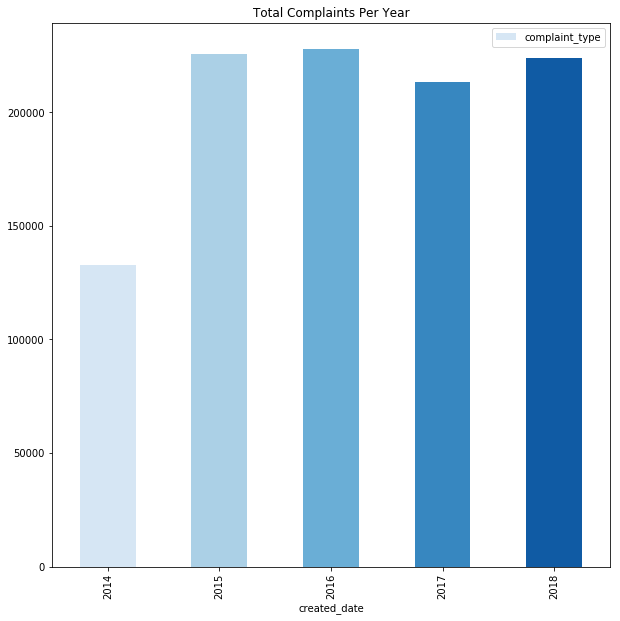

In [30]:
df_data_1.plot(x="created_date", y="complaint_type", kind="bar", figsize = (10,10), color=sns.color_palette("Blues", len(df_data_1)))
plt.title('Total Complaints Per Year')

### Step 14 - Create a set of predictor x and target y variables

In [31]:
x = df_data_1["created_date"]
y = df_data_1["complaint_type"]

### Step 15 - Preprocessing predictor data for modelling

In [32]:
x = np.asarray(x)

In [33]:
x = x.reshape(-1, 1)

### Step 16 - Defining and fitting the model

In [34]:
from sklearn.linear_model import LinearRegression 
linear_reg = LinearRegression()
linear_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Step 17 - Using the trained model to predict total number of complaints that department can expect for the year 2019

In [35]:
linear_reg.predict([[2019]])

array([255742.90000001])

### Conclusions : A simple model can be created based on historic data available, to predict the number of future complaints for 2019
### using Linear Regression Algorithm as we are trying to predict a continuous value (number of complaints) based on single variable (date).

### Creating a predictive model using Decision Tree Classification algorithm to estimate the probability/possibility of complaints of 
### specific type (here top complaint) based on the relation between its occurrence due to different characteristics of a house.

### Step 1 - Create a pandas dataframe "df_data_2" with only 2 columns from the data available in csv format

In [40]:
col = ['complaint_type', 'incident_address']

body = client_273faebd9bbe4696bb7782fea6804875.get_object(Bucket='capstoneex1ram-donotdelete-pr-c3pfkhjz0s3lno',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
df_data_2 = pd.read_csv(body, usecols = col)
df_data_2.head()

,complaint_type,incident_address
0,GENERAL,1055 JEROME AVENUE
1,APPLIANCE,441 BROOKLYN AVENUE
2,WATER LEAK,24-35 CRESCENT STREET
3,PLUMBING,778 LINCOLN PLACE
4,GENERAL,1405 70 STREET


### Step 2 - Identify unique values for the column complaint_type

In [41]:
df_data_2["complaint_type"].unique()

array(['GENERAL', 'APPLIANCE', 'WATER LEAK', 'PLUMBING', 'ELECTRIC',
       'HEAT/HOT WATER', 'UNSANITARY CONDITION', 'DOOR/WINDOW', 'SAFETY',
       'PAINT/PLASTER', 'FLOORING/STAIRS', 'ELEVATOR', 'Safety',
       'Unsanitary Condition', 'OUTSIDE BUILDING', 'General', 'Appliance',
       'Mold', 'Plumbing', 'Outside Building', 'HPD Literature Request',
       'HEATING', 'GENERAL CONSTRUCTION', 'PAINT - PLASTER', 'NONCONST',
       'CONSTRUCTION', 'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT'],
      dtype=object)

### Covert multi-label data of the column complaint_type to binary in order to create a model that predicts the "Probabilty of occurance of top complaint type"
###  based on given house characteristics

In [ ]:
#Step 3 - Categorize values for the column complaint_type into 2 classes YES & NO i.e. complaints related to heat and hot water are lablled yes and all others as no

In [42]:
import numpy as np
df_data_2["complaint_type"] = np.where(df_data_2["complaint_type"]=='HEAT/HOT WATER','YES',df_data_2["complaint_type"])
df_data_2["complaint_type"] = np.where(df_data_2["complaint_type"]=='HEATING','YES',df_data_2["complaint_type"])
df_data_2["complaint_type"] = np.where(df_data_2["complaint_type"]!='YES', 'NO',df_data_2["complaint_type"])
df_data_2.head()

,complaint_type,incident_address
0,NO,1055 JEROME AVENUE
1,NO,441 BROOKLYN AVENUE
2,NO,24-35 CRESCENT STREET
3,NO,778 LINCOLN PLACE
4,NO,1405 70 STREET


### Step 4 - Create a pandas dataframe "df_pluto_data" containing 5 columns from the data available in csv format

In [43]:
col = ['address','resarea','bldgarea','bldgdepth','numfloors']

body = client_273faebd9bbe4696bb7782fea6804875.get_object(Bucket='capstoneex1ram-donotdelete-pr-c3pfkhjz0s3lno',Key='Pluto_All_Files_18v2_1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
df_pluto_data = pd.read_csv(body, usecols = col)
df_pluto_data.head()

,address,bldgarea,resarea,numfloors,bldgdepth
0,CITY ISLAND AVENUE,0.0,NaN,0.0,0.0
1,8-03 117 STREET,3130.0,3130.0,2.5,25.0
2,SEMINOLE AVENUE,0.0,NaN,0.0,0.0
3,EAST 156 STREET,0.0,NaN,0.0,0.0
4,216 FRANKLIN AVENUE,1590.0,1590.0,2.5,30.0


### Step 5 - Discard duplicates

In [44]:
df_pluto_data.drop_duplicates(subset="address", keep='first', inplace=True)
df_pluto_data.head()

,address,bldgarea,resarea,numfloors,bldgdepth
0,CITY ISLAND AVENUE,0.0,NaN,0.0,0.0
1,8-03 117 STREET,3130.0,3130.0,2.5,25.0
2,SEMINOLE AVENUE,0.0,NaN,0.0,0.0
3,EAST 156 STREET,0.0,NaN,0.0,0.0
4,216 FRANKLIN AVENUE,1590.0,1590.0,2.5,30.0


### Step 6 - Change column name from incident_address to address to facilitate merging of two dataframes i.e. df_311nyc and df_pluto

In [45]:
df_data_2.rename(columns={"incident_address":"address"},inplace=True)
df_data_2.head()

,complaint_type,address
0,NO,1055 JEROME AVENUE
1,NO,441 BROOKLYN AVENUE
2,NO,24-35 CRESCENT STREET
3,NO,778 LINCOLN PLACE
4,NO,1405 70 STREET


In [ ]:
#Step 7 - Merge the above mentioned 2 dataframes using inner join

In [46]:
df_data_2_inner = pd.merge(df_data_2, df_pluto_data, on='address', how='inner')
df_data_2_inner.head(20)

,complaint_type,address,bldgarea,resarea,numfloors,bldgdepth
0,NO,1055 JEROME AVENUE,65667.0,65667.0,7.0,71.0
1,YES,1055 JEROME AVENUE,65667.0,65667.0,7.0,71.0
2,NO,1055 JEROME AVENUE,65667.0,65667.0,7.0,71.0
3,NO,1055 JEROME AVENUE,65667.0,65667.0,7.0,71.0
4,YES,1055 JEROME AVENUE,65667.0,65667.0,7.0,71.0
5,NO,1055 JEROME AVENUE,65667.0,65667.0,7.0,71.0
6,NO,1055 JEROME AVENUE,65667.0,65667.0,7.0,71.0
7,NO,1055 JEROME AVENUE,65667.0,65667.0,7.0,71.0
8,NO,1055 JEROME AVENUE,65667.0,65667.0,7.0,71.0
9,NO,1055 JEROME AVENUE,65667.0,65667.0,7.0,71.0


In [48]:
df_data_2_inner.tail(20)

,complaint_type,address,bldgarea,resarea,numfloors,bldgdepth
4647752,NO,390 GRAND CONCOURSE,20000.0,18600.0,5.0,80.0
4647753,NO,390 GRAND CONCOURSE,20000.0,18600.0,5.0,80.0
4647754,NO,390 GRAND CONCOURSE,20000.0,18600.0,5.0,80.0
4647755,NO,390 GRAND CONCOURSE,20000.0,18600.0,5.0,80.0
4647756,NO,390 GRAND CONCOURSE,20000.0,18600.0,5.0,80.0
4647757,NO,390 GRAND CONCOURSE,20000.0,18600.0,5.0,80.0
4647758,NO,390 GRAND CONCOURSE,20000.0,18600.0,5.0,80.0
4647759,NO,1250 WARD AVENUE,175730.0,0.0,5.0,108.0
4647760,NO,1250 WARD AVENUE,175730.0,0.0,5.0,108.0
4647761,NO,1250 WARD AVENUE,175730.0,0.0,5.0,108.0


### Step 8 - Drop null values

In [49]:
df_data_2_inner.dropna(how="any",inplace=True)

### Step 9 - Create set of predictor x and target y variable

In [50]:
x = df_data_2_inner[['resarea','bldgarea','bldgdepth','numfloors']].values
y = df_data_2_inner[["complaint_type"]].values

### Step 10 - Create training and testing dataset

In [51]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(x,y,test_size=0.3,random_state=4)

### Step 11 - Definie the Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
complaintTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
print(complaintTree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


### Step 12 - Training the model using training data

In [53]:
complaintTree.fit(train_X,train_Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Step 13 - Testing the model using testing data

In [54]:
predicted_Y = complaintTree.predict(test_X)

### Step 14 - Measuring accuracy of the classifier

In [55]:
from sklearn import metrics
metrics.accuracy_score(test_Y, predicted_Y)

0.6548454710117153

### Step 15 - Predicting probability if there will be any heat/hot water complaints for a house with the following characteristics 
### for resarea, bldgarea, bldgdepth, numfloors using our model

In [56]:
predictY = complaintTree.predict([["0.0","10800","141","2"]])
predictY

array(['NO'], dtype=object)

### Conclusions : A predictive model can be created to estimate the probability of complaints of specific type (here top complaint) based on the relation between its occurrence due to different characteristics of a house.

## Remember the question: Can a predictive model be built for future prediction of the possibility of Complaints of the type that you identified in response to Question 1?


## Answer : Yes,  A predictive model can be created to estimate the probability of complaints of specific type (here top complaint) based on the relation between its occurrence due to different characteristics of a house.

## Conclusions and Other Observations

### From the graph plotted at Step - 8, we can conclude that number of top complaint type i.e. HEAT/HOT WATER increases at the beginning of every year i.e. during winters and decreses after mid-year i.e. during summers'

### Conclusions : A simple model can be created based on historic data available, to predict the number of future complaints for 2019
### using Linear Regression Algorithm as we are trying to predict a continuous value (number of complaints) based on single variable (date).

### Creating a predictive model using Decision Tree Classification algorithm to estimate the probability/possibility of complaints of 
### specific type (here top complaint) based on the relation between its occurrence due to different characteristics of a house.